In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def rolling_adf(df, col, window_size=30):
    """
    Calculate the Augmented Dickey-Fuller test statistic on a rolling window.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the column on which to perform the ADF test.
    col : str
        The name of the column on which to perform the ADF test.
    window_size : int
        The size of the rolling window.

    Returns:
    --------
    df_copy : pandas.DataFrame
        A new DataFrame with an additional column containing the rolling ADF test statistic.
    """
    df_copy = df.copy()
    
    # Create an empty series to store rolling ADF test statistic
    rolling_adf_stat = pd.Series(dtype='float64', index=df_copy.index)

    # Loop through the DataFrame by `window_size` and apply `adfuller`.
    for i in range(window_size, len(df)):
        window = df_copy[col].iloc[i-window_size:i]
        adf_result = adfuller(window)
        adf_stat = adf_result[0]
        rolling_adf_stat.at[df_copy.index[i]] = adf_stat

    # Add the rolling ADF test statistic series to the original DataFrame
    df_copy['rolling_adf_stat'] = rolling_adf_stat
    
    return df_copy

In [8]:
df = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_EURUSD.csv")
df = df.iloc[0:200,:]
df = rolling_adf(df, 'close', window_size=50)

<AxesSubplot:>

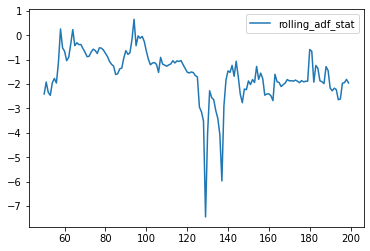

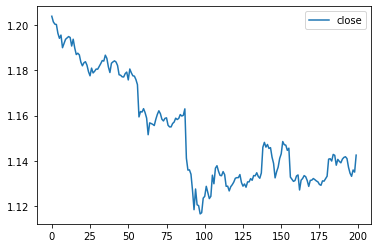

In [9]:
df[["rolling_adf_stat"]].plot()
df[["close"]].plot()